# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Importing dataset

In [3]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')
df_sales = pd.concat([df_train,df_test],ignore_index=True)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape of dataset
df_sales.shape

(14204, 12)

In [5]:
# File summary
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
# Description
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Feature name
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Checking missing values
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Item weight and outlet size and item outlets sales has missing values. So need to impute missing values.

<AxesSubplot:>

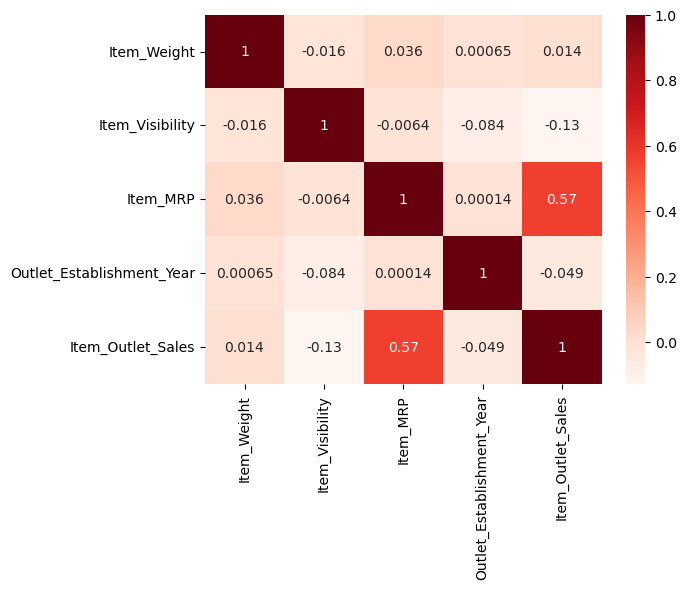

In [10]:
#Checking corelation
sns.heatmap(df_sales.corr(),annot=True,cmap='Reds')

# 3. EDA

In [11]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

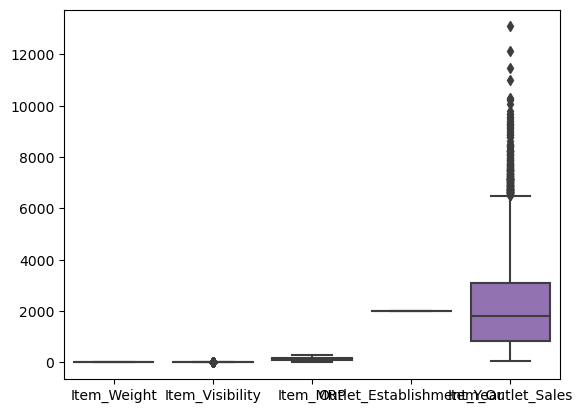

In [12]:
# Chek for outliers
sns.boxplot(data=df_sales)

<AxesSubplot:xlabel='Item_Weight'>

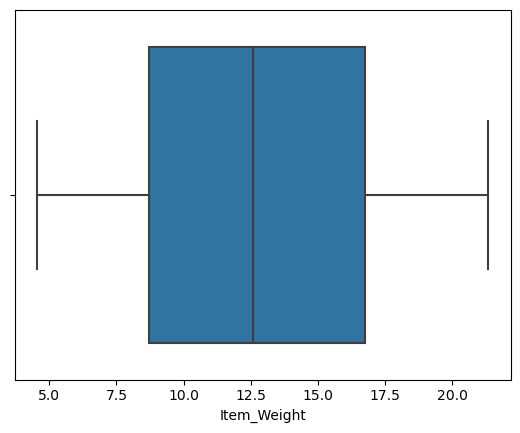

In [13]:
# plotting sinle box plot
sns.boxplot(data=df_sales,x='Item_Weight')

<AxesSubplot:xlabel='Item_Visibility'>

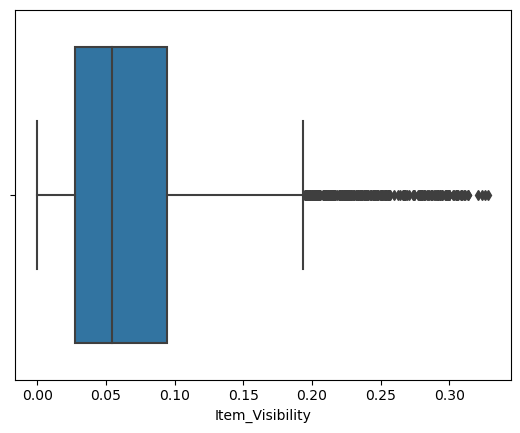

In [14]:
sns.boxplot(data=df_sales,x='Item_Visibility')

<AxesSubplot:xlabel='Item_MRP'>

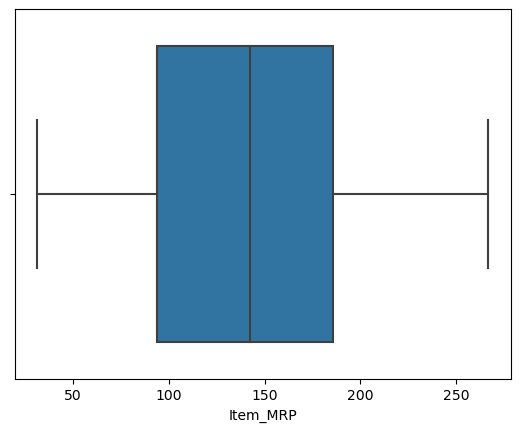

In [15]:
sns.boxplot(data=df_sales,x='Item_MRP')

<AxesSubplot:xlabel='Item_Outlet_Sales'>

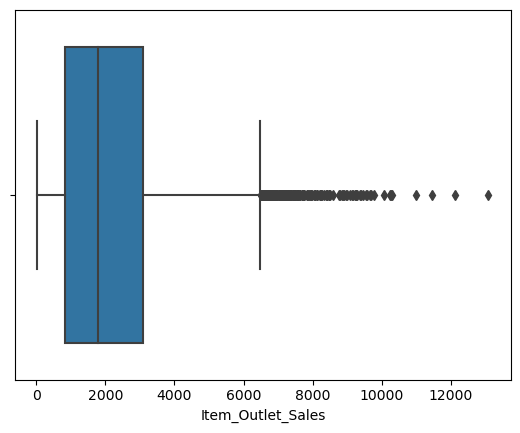

In [16]:
sns.boxplot(data=df_sales,x='Item_Outlet_Sales')

In [17]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
# Checking individul value count in categorical column
for i in df_sales.columns:
    if df_sales[i].dtype == 'object':
        print(df_sales[i].value_counts())
    print()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int

In [19]:
# Replacing the low fat to Low Fat and lf to Low Fat and reg to regular
df_sales['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df_sales['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df_sales['Item_Fat_Content'].replace('reg','Regular',inplace=True)

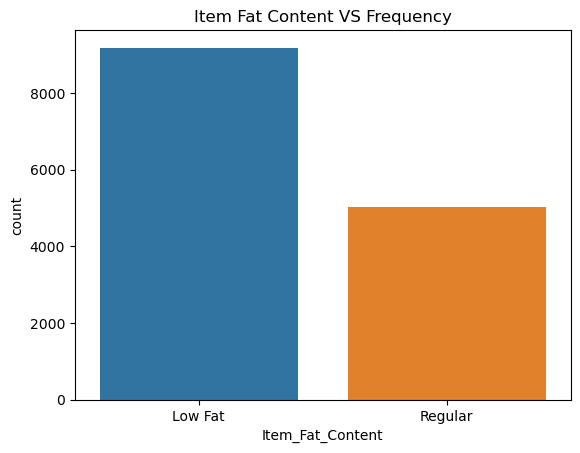

In [20]:
sns.countplot(data=df_sales,x='Item_Fat_Content')
plt.title('Item Fat Content VS Frequency')
plt.show()

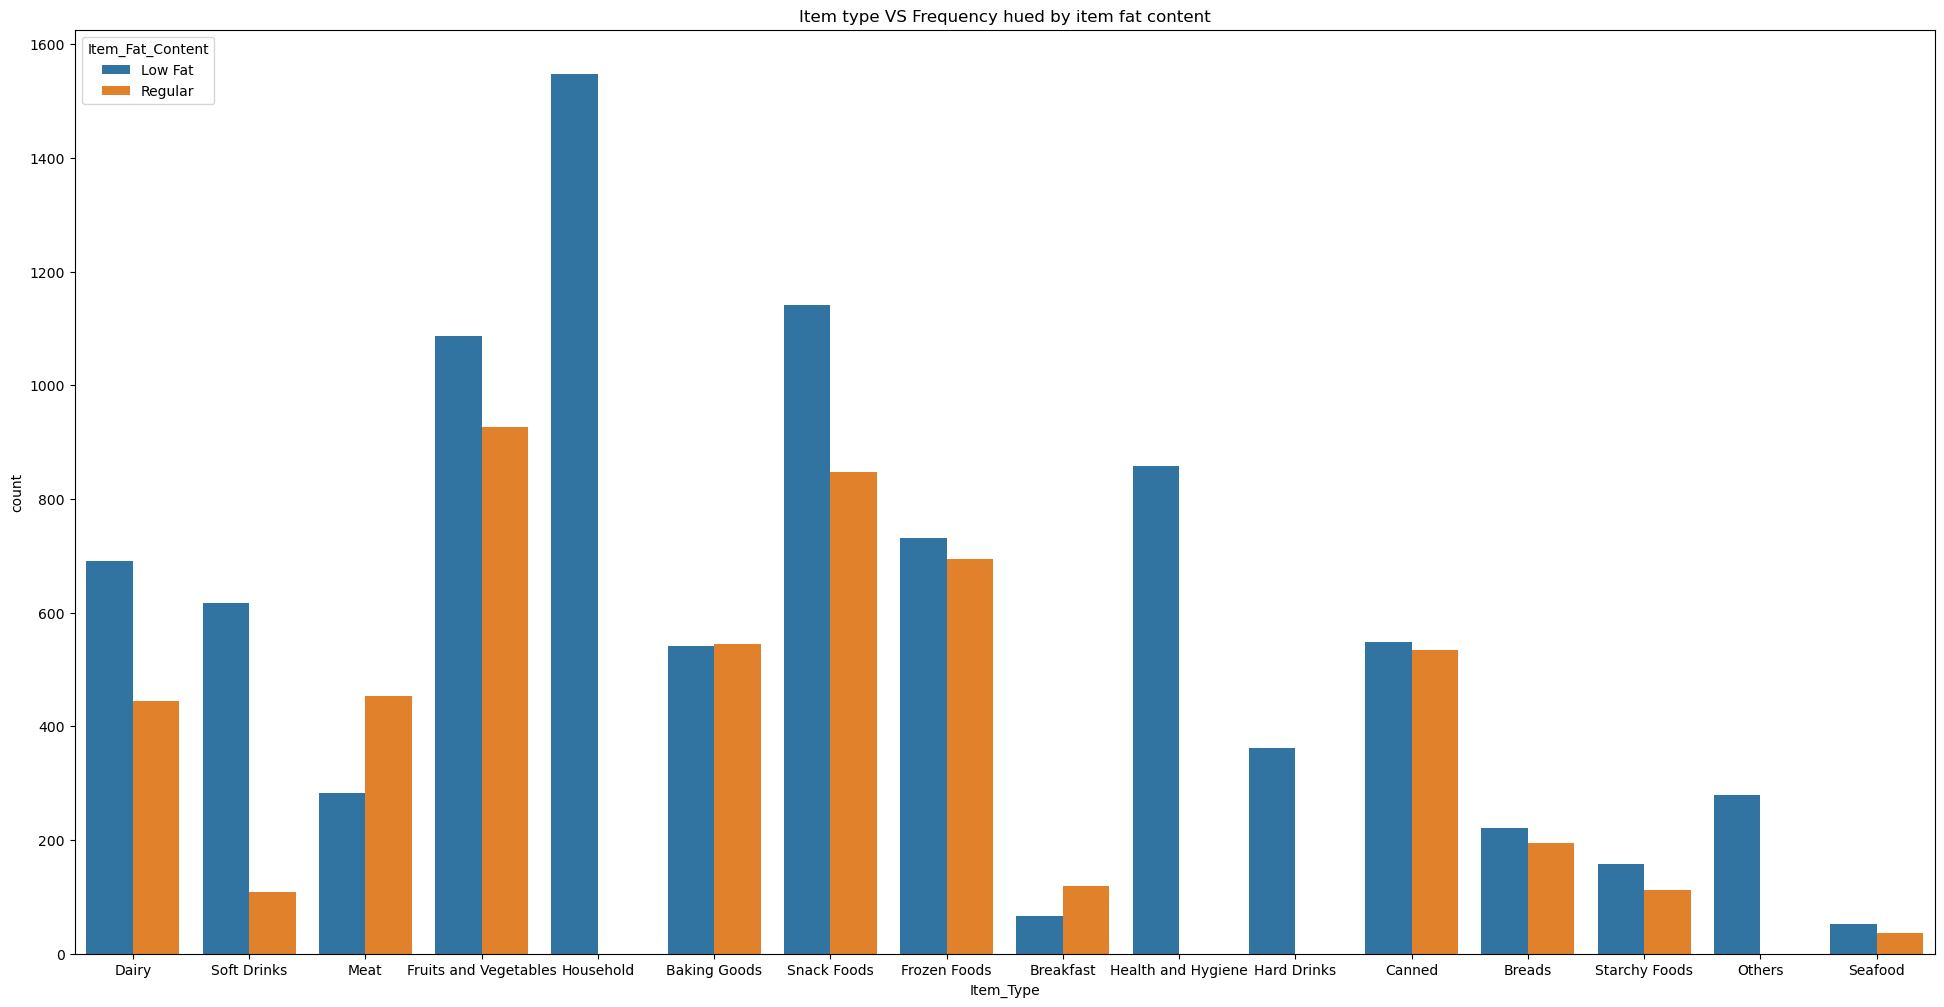

In [21]:
plt.figure(figsize=(24,12))
sns.countplot(data=df_sales,x='Item_Type',hue='Item_Fat_Content')
plt.title('Item type VS Frequency hued by item fat content')
plt.show()

In [22]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [23]:
df_sales['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [24]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(df_sales['Outlet_Size'].mode().iloc[0])

In [25]:
df_sales['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [26]:
# Now imputing the item weight with mean value 
weight = df_sales.groupby(['Item_Identifier']).agg({'Item_Weight':'mean'})
weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [27]:
for index in weight.index:
    null_condition = df_sales.loc[df_sales['Item_Identifier'] == index,['Item_Weight']].isnull()
    for index_2 in null_condition.index:
        if null_condition.loc[index_2][0] == True:
            df_sales.loc[index_2,['Item_Weight']] = weight.loc[index][0]

In [28]:
df_sales[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
#We observe that item visibility can't be 0 so we have to replace it by mean of 'Item_Visibility' groupped by 'Item_Identifier'
visibility=df_sales.groupby(["Item_Identifier"]).agg({"Item_Visibility":"mean"})
visibility
for index in visibility.index:
    visibility0=df_sales.loc[(df_sales["Item_Identifier"]==index)&(df_sales["Item_Visibility"]==0)]
    if len(visibility0.index)>0:
        for index_2 in visibility0.index:
            df_sales.loc[index_2,["Item_Visibility"]]=visibility.loc[index][0]

df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [30]:
df_mart = pd.get_dummies(df_sales,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df_mart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.017834,182.0950,OUT010,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,NaN,0,1,0,...,0,0,1,1,0,0,0,1,0,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,NaN,0,1,0,...,0,1,0,0,0,1,0,0,1,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,NaN,1,0,0,...,0,1,0,0,1,0,0,1,0,0
14202,FDJ26,15.30,0.088380,214.6218,OUT017,2007,NaN,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [33]:
# Checking a skewness
check = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in df_mart.skew().index:
    if i in check:
        print('Skewness of column {} : {}'.format(i,df_mart.skew().loc[i]))

Skewness of column Item_Weight : 0.10041690891741965
Skewness of column Item_Visibility : 1.2574052519888317
Skewness of column Item_MRP : 0.13072836040225866
Skewness of column Outlet_Establishment_Year : -0.39646519008637443


In [34]:
# remove the skewness
df_mart.skew()
for i in df_mart.skew().index:
    if i in check:
        if df_mart.skew().loc[i] > 0.5:
            df_mart[i] = np.sqrt(df_mart[i])
        elif df_mart.skew().loc[i] <-0.5:
            df_mart[i] = np.cbrt(df_mart[i])

In [36]:
# Once again check skewness
for i in df_mart.skew().index:
    if i in check:
        print('Skewness of column {} : {}'.format(i,df_mart.skew().loc[i]))

Skewness of column Item_Weight : 0.10041690891741965
Skewness of column Item_Visibility : 0.41413332304805806
Skewness of column Item_MRP : 0.13072836040225866
Skewness of column Outlet_Establishment_Year : -0.39646519008637443


In [39]:
# Based on observation 'Item_Identifier' and 'Outlet_Identifier' can be dropped as it is not so important variable
df_mart.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_mart

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.129461,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.133545,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.098893,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.116174,141.3154,1997,NaN,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
14200,7.60,0.378141,169.1448,2009,NaN,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14201,10.00,0.271162,118.7440,2002,NaN,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
14202,15.30,0.297288,214.6218,2007,NaN,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [42]:
# Making testing and training data
df_mart['Source'] = 'Source'

for i in range(len(df_mart['Item_Outlet_Sales'])):
    if pd.isnull(df_mart['Item_Outlet_Sales'][i]):
        df_mart['Source'][i] = 'Test'
    else:
        df_mart['Source'][i]= 'Train'
df_mart

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Source
0,9.30,0.126678,249.8092,1999,3735.1380,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,Train
1,5.92,0.138846,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,Train
2,17.50,0.129461,141.6180,1999,2097.2700,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,Train
3,19.20,0.133545,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,Train
4,8.93,0.098893,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.116174,141.3154,1997,NaN,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,Test
14200,7.60,0.378141,169.1448,2009,NaN,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,Test
14201,10.00,0.271162,118.7440,2002,NaN,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,Test
14202,15.30,0.297288,214.6218,2007,NaN,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,Test


In [43]:
# Now seperate train and test data
df_train = df_mart.loc[df_mart['Source'] == 'Train']
df_test = df_test.loc[df_mart['Source'] == 'Test']

In [44]:
# Seperate input and output variable
df_x = df_train.drop(columns=['Item_Outlet_Sales','Source'])
y = df_train[['Item_Outlet_Sales']]

In [45]:
# bring every to column to standard scale using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X = scaler.fit_transform(df_x)
X = pd.DataFrame(X,columns=df_x.columns)

In [48]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.769246,-1.327063,1.747454,0.139541,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
1,-1.496813,-1.194100,-1.489023,1.334103,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028
2,0.995858,-1.296655,0.010040,0.139541,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
3,1.361794,-1.252022,0.660050,0.020085,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028
4,-0.848890,-1.630673,-1.399220,-1.293934,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,2.853918,-1.251866,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.293395,-0.107430,1.180783,-1.293934,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,2.853918,-1.251866,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028
8519,-0.967282,-0.342783,-0.527301,0.497909,-1.354743,1.354743,3.486083,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
8520,-0.489412,-0.661575,-0.897208,0.736822,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,-1.251866,1.602840,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
8521,-1.219132,1.452812,-0.607977,1.334103,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028


In [49]:
# Defiing a functon to find maximum r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [50]:
def maximum_r2_score(model,inp,output):
    max_r2_score = 0
    for r_state in range(42,101):
        X_train,X_test,y_train,y_test = train_test_split(inp,output,random_state=r_state,test_size=0.3)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score coresponding to',r_state,'is :',r2_scr)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    
    print()
    print('Max r2_score corresponding to',final_r_state,'is :',max_r2_score)
    return final_r_state

In [51]:
from sklearn.model_selection import cross_val_score
def model_evel(model,x,y):
    c_score = cross_val_score(model,x,y,cv=5,scoring='r2')
    print('Mean r2_score of regressor is :',c_score.mean())

In [52]:
# Using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
X_pca = pca.fit_transform(X)

In [53]:
# Using decsionTree
from sklearn.tree import DecisionTreeRegressor

In [54]:
dtr = DecisionTreeRegressor()

In [55]:
r_state = maximum_r2_score(dtr,X_pca,y)

r2_score coresponding to 42 is : 0.1330653684514983
r2_score coresponding to 43 is : 0.1406050504246097
r2_score coresponding to 44 is : 0.07258555692705959
r2_score coresponding to 45 is : 0.1570499555779301
r2_score coresponding to 46 is : 0.16771059029907875
r2_score coresponding to 47 is : 0.10148268391370352
r2_score coresponding to 48 is : 0.17722915066035905
r2_score coresponding to 49 is : 0.17458731551314866
r2_score coresponding to 50 is : 0.16069510999225567
r2_score coresponding to 51 is : 0.10077097649174549
r2_score coresponding to 52 is : 0.10978323274976909
r2_score coresponding to 53 is : 0.148957748126476
r2_score coresponding to 54 is : 0.16163591476212757
r2_score coresponding to 55 is : 0.1633830887314338
r2_score coresponding to 56 is : 0.15422991321572388
r2_score coresponding to 57 is : 0.14908925527289163
r2_score coresponding to 58 is : 0.15161141041737347
r2_score coresponding to 59 is : 0.11493737197005105
r2_score coresponding to 60 is : 0.19073284397092483

In [56]:
# Using random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
rf = RandomForestRegressor()

In [59]:
parameters = {'n_estimators':[10,100,500]}
clf = GridSearchCV(rf,parameters,cv=5,scoring='r2')
clf.fit(X_pca,y)
clf.best_params_

{'n_estimators': 500}

In [61]:
rfr = RandomForestRegressor(n_estimators=500)
r = maximum_r2_score(rfr,X_pca,y)

r2_score coresponding to 42 is : 0.5453916201486426
r2_score coresponding to 43 is : 0.5777925281717998
r2_score coresponding to 44 is : 0.5624833058733947
r2_score coresponding to 45 is : 0.5532520281687516
r2_score coresponding to 46 is : 0.5308701245623076
r2_score coresponding to 47 is : 0.5369929719289941
r2_score coresponding to 48 is : 0.5462388608112057
r2_score coresponding to 49 is : 0.554927700320752
r2_score coresponding to 50 is : 0.5467472898262327
r2_score coresponding to 51 is : 0.5397837090138459
r2_score coresponding to 52 is : 0.5420499108990399
r2_score coresponding to 53 is : 0.5437588961232176
r2_score coresponding to 54 is : 0.5737691578217827
r2_score coresponding to 55 is : 0.5458507525573741
r2_score coresponding to 56 is : 0.533125277599565
r2_score coresponding to 57 is : 0.5637264543445288
r2_score coresponding to 58 is : 0.5684281029011642
r2_score coresponding to 59 is : 0.5498709891441143
r2_score coresponding to 60 is : 0.5796661261388028
r2_score cores

In [63]:
# Using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor


In [64]:
kn = KNeighborsRegressor()

In [65]:
parameters = {'n_neighbors':range(2,30)}
kn_cv = GridSearchCV(kn,parameters,cv=5,scoring='r2')
kn_cv.fit(X_pca,y)
kn_cv.best_params_

{'n_neighbors': 8}

In [66]:
knr = KNeighborsRegressor(n_neighbors=8)
r_knr = maximum_r2_score(knr,X_pca,y)

r2_score coresponding to 42 is : 0.47303070353769106
r2_score coresponding to 43 is : 0.481771507750027
r2_score coresponding to 44 is : 0.485891932468798
r2_score coresponding to 45 is : 0.4737073333350251
r2_score coresponding to 46 is : 0.4596936879511234
r2_score coresponding to 47 is : 0.45993535979858435
r2_score coresponding to 48 is : 0.48113323777270667
r2_score coresponding to 49 is : 0.48504871690555973
r2_score coresponding to 50 is : 0.4808666983716068
r2_score coresponding to 51 is : 0.4731880950118712
r2_score coresponding to 52 is : 0.476951332047038
r2_score coresponding to 53 is : 0.4627528789499378
r2_score coresponding to 54 is : 0.492900428115821
r2_score coresponding to 55 is : 0.4733393570959933
r2_score coresponding to 56 is : 0.4646913943075621
r2_score coresponding to 57 is : 0.46723630556985907
r2_score coresponding to 58 is : 0.4812691107340106
r2_score coresponding to 59 is : 0.47936685122323064
r2_score coresponding to 60 is : 0.49392326050991797
r2_score 

In [68]:
# Using SVM Regressor
from sklearn.svm import SVR
sv = SVR()
parameters = {'kernel':['linear','poly','rbf'],'C':[0.001,0.01,0.1,1,10]}
sv_cv = GridSearchCV(sv,parameters,cv=5,scoring='r2')
sv_cv.fit(X_pca,y)
sv_cv.best_params_

{'C': 10, 'kernel': 'linear'}

In [69]:
svr = SVR(kernel='linear',C=10)
r_svr = maximum_r2_score(svr,X_pca,y)

r2_score coresponding to 42 is : 0.48904418965909324
r2_score coresponding to 43 is : 0.48851688745323585
r2_score coresponding to 44 is : 0.49442110622575086
r2_score coresponding to 45 is : 0.48101119260668
r2_score coresponding to 46 is : 0.4847312194853125
r2_score coresponding to 47 is : 0.47904227457169246
r2_score coresponding to 48 is : 0.47539226082046593
r2_score coresponding to 49 is : 0.47987276481850016
r2_score coresponding to 50 is : 0.49238921954568726
r2_score coresponding to 51 is : 0.48449143169150244
r2_score coresponding to 52 is : 0.5007546664385978
r2_score coresponding to 53 is : 0.48264679580844183
r2_score coresponding to 54 is : 0.4919654188844582
r2_score coresponding to 55 is : 0.4711797081162773
r2_score coresponding to 56 is : 0.4712735242122761
r2_score coresponding to 57 is : 0.47573569580089226
r2_score coresponding to 58 is : 0.49813690717038484
r2_score coresponding to 59 is : 0.4842494309554549
r2_score coresponding to 60 is : 0.5033416778484
r2_sco

In [70]:
# Using Decision Tree Regressor
print('DecisionTree Regressor\n')
model_evel(dtr,X_pca,y)

DecisionTree Regressor

Mean r2_score of regressor is : 0.15216543665634127


In [71]:
# Using Random Forest Regressor
print('Random Forest Regressor\n')
model_evel(rfr,X_pca,y)

Random Forest Regressor

Mean r2_score of regressor is : 0.5514507106413411


In [73]:
# Using KNeighborsRegressor
print('KNeighbors Regressor\n')
model_evel(knr,X_pca,y)

KNeighbors Regressor

Mean r2_score of regressor is : 0.4852160534701525


In [74]:
# Using Support Vector Machine
print('Support Vector Machine\n')
model_evel(svr,X_pca,y)

Support Vector Machine

Mean r2_score of regressor is : 0.48549559221125094


In [75]:
# Based on above r2_score Random Forest is performing better
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=60)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
print('MAE :',mean_absolute_error(y_test,y_pred))

MAE : 791.0699661921407


In [78]:
print('MSE :',mean_squared_error(y_test,y_pred))

MSE : 1249485.376763769


In [79]:
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 1117.8038185494665


In [80]:
print('r2_score :',r2_score(y_test,y_pred))

r2_score : 0.5735026971559273
